In [2]:
import pandas as pd

# Load the XLSX file
df = pd.read_excel('intel.xlsx')

# Display the first few rows
print(df.head())


                                        Product name  \
0  Intel Core i7-12700K Desktop Processor 12 (8P+...   
1  Intel Core i7-12700K Desktop Processor 12 (8P+...   
2  Intel Core i7-12700K Desktop Processor 12 (8P+...   
3  Intel Core i7-12700K Desktop Processor 12 (8P+...   
4  Intel Core i7-12700K Desktop Processor 12 (8P+...   

                                     Review Title  \
0                   A superb piece of a processor   
1  Beast processor with Intel UHD shared Graphics   
2                                           Great   
3                                  Fast processor   
4                                     It's Intel!   

                                         Review Text  Rating  
0  No doubt, 12th gen Intel processors are a marv...     5.0  
1  Overall good processor for the price and more ...     5.0  
2  Excellent processor, mounted on the PC perfect...     5.0  
3  Does exactly what it's supposed to do, my comp...     5.0  
4  Working well, stable and c

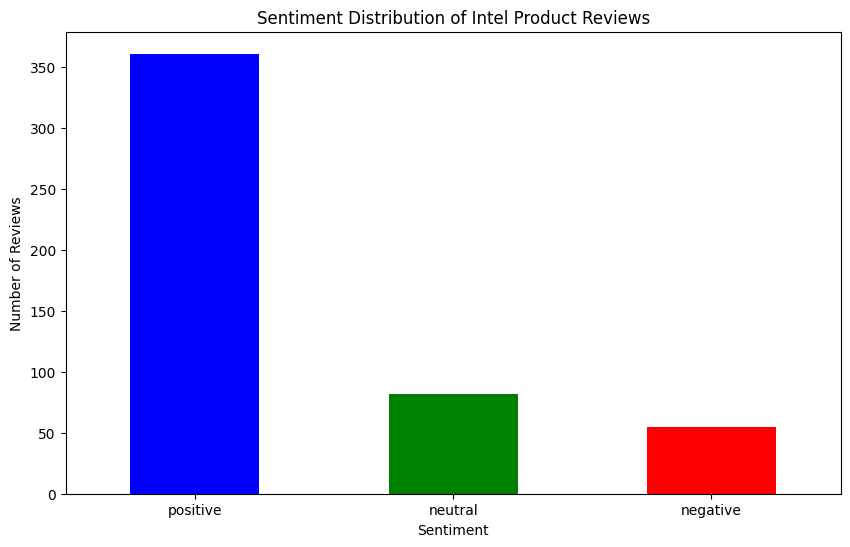

Sentiment
positive    72.489960
neutral     16.465863
negative    11.044177
Name: proportion, dtype: float64


In [8]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the XLSX file
df = pd.read_excel('intel.xlsx')

# Drop rows with missing 'Review Text'
df = df.dropna(subset=['Review Text'])

# Data preprocessing
df.loc[:, 'Review Text'] = df['Review Text'].str.lower()  # Convert text to lowercase
df.loc[:, 'Review Text'] = df['Review Text'].replace('[^\w\s]', '', regex=True)  # Remove punctuation

# Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['Sentiment'] = df['Review Text'].apply(get_sentiment)

# Visualization
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Sentiment Distribution of Intel Product Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Summary Statistics
sentiment_summary = df['Sentiment'].value_counts(normalize=True) * 100
print(sentiment_summary)


C:\Users\Pranav\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\Pranav\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Pranav\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\Pranav\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated

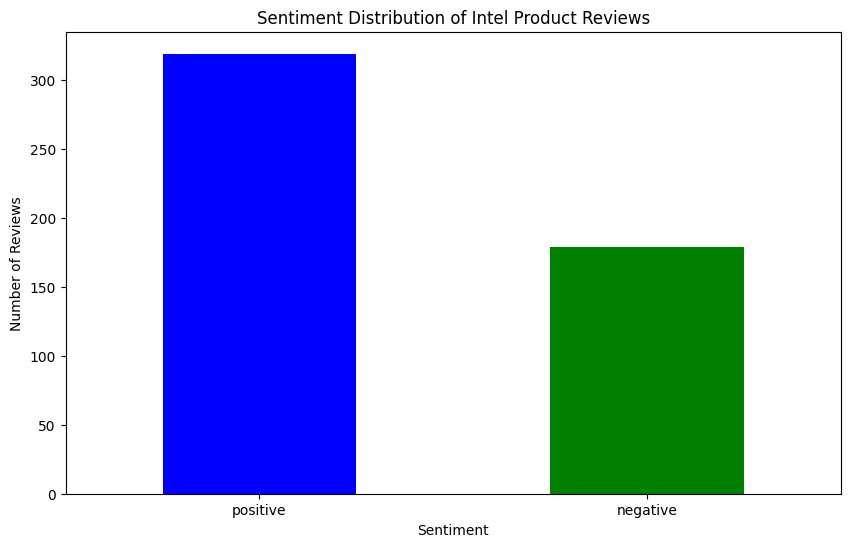

Sentiment
positive    64.056225
negative    35.943775
Name: proportion, dtype: float64


In [9]:
import pandas as pd
from transformers import pipeline

# Load the XLSX file
df = pd.read_excel('intel.xlsx')

# Drop rows with missing 'Review Text'
df = df.dropna(subset=['Review Text'])

# Load sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

# Function to get sentiment
def transformers_sentiment(text):
    result = sentiment_pipeline(text)
    return result[0]['label'].lower()

# Apply sentiment analysis
df['Sentiment'] = df['Review Text'].apply(transformers_sentiment)

# Visualization
import matplotlib.pyplot as plt

# Count sentiment categories
sentiment_counts = df['Sentiment'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Sentiment Distribution of Intel Product Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Summary Statistics
sentiment_summary = df['Sentiment'].value_counts(normalize=True) * 100
print(sentiment_summary)


In [10]:
pip install vaderSentiment


   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 325.1 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/126.0 kB 491.5 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 741.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


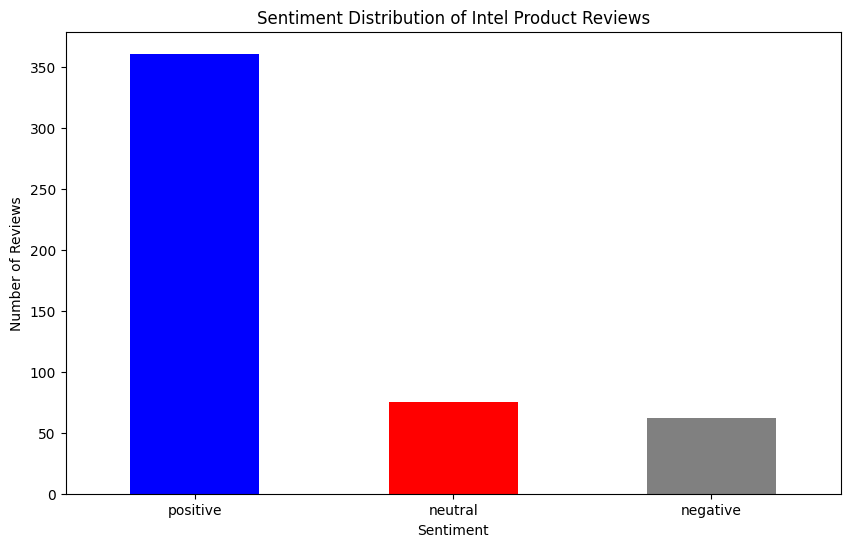

Sentiment
positive    72.489960
neutral     15.060241
negative    12.449799
Name: proportion, dtype: float64


In [11]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the XLSX file
df = pd.read_excel('intel.xlsx')

# Drop rows with missing 'Review Text'
df = df.dropna(subset=['Review Text'])

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment
def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] > 0.05:  # Positive sentiment threshold
        return 'positive'
    elif score['compound'] < -0.05:  # Negative sentiment threshold
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['Sentiment'] = df['Review Text'].apply(vader_sentiment)

# Visualization
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'red', 'gray'])
plt.title('Sentiment Distribution of Intel Product Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Summary Statistics
sentiment_summary = df['Sentiment'].value_counts(normalize=True) * 100
print(sentiment_summary)


In [14]:
product_sentiment_summary = df.groupby('Product name')['Sentiment'].value_counts(normalize=True).unstack().fillna(0) * 100
print(product_sentiment_summary)

Sentiment                                            negative    neutral  \
Product name                                                               
Intel Arc A750 8GB PCI_E_X16 GDDR6 Graphics Card    11.000000  13.000000   
Intel Core I5 12400F 12 Gen Generation Desktop ...  15.053763  16.129032   
Intel Core i7-12700K Desktop Processor 12 (8P+4...  10.000000  17.000000   
Intel Core i9-13900K Desktop Processor LGA 1700...  12.621359  19.417476   
Intel® Core i3-12100 Processor 12M Cache, up to...  13.725490   9.803922   

Sentiment                                            positive  
Product name                                                   
Intel Arc A750 8GB PCI_E_X16 GDDR6 Graphics Card    76.000000  
Intel Core I5 12400F 12 Gen Generation Desktop ...  68.817204  
Intel Core i7-12700K Desktop Processor 12 (8P+4...  73.000000  
Intel Core i9-13900K Desktop Processor LGA 1700...  67.961165  
Intel® Core i3-12100 Processor 12M Cache, up to...  76.470588  


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract keywords
def extract_keywords(texts, n=10):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
    X = vectorizer.fit_transform(texts)
    keywords = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1
    keyword_counts = dict(zip(keywords, counts))
    sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_keywords[:n]

# Extract keywords for each product
for product in df['Product name'].unique():
    product_reviews = df[df['Product name'] == product]['Review Text']
    print(f"Keywords for {product}:")
    keywords = extract_keywords(product_reviews, n=10)
    print(keywords)
    print()


Keywords for Intel Core i7-12700K Desktop Processor 12 (8P+4E) Cores up to 5.0 GHz Unlocked LGA 1700 600 Series Chipset 125W:
[('cpu', 39), ('good', 26), ('intel', 16), ('great', 14), ('gen', 12), ('price', 12), ('processor', 12), ('product', 11), ('gaming', 10), ('graphics', 10)]

Keywords for Intel® Core i3-12100 Processor 12M Cache, up to 4.30 GHz LGA1700 Socket:
[('processor', 30), ('good', 19), ('cpu', 18), ('performance', 16), ('price', 13), ('fan', 11), ('great', 11), ('cooler', 10), ('graphics', 10), ('gaming', 9)]

Keywords for Intel Core i9-13900K Desktop Processor LGA 1700 24 cores (8 P-cores + 16 E-cores) 36M Cache, up to 5.8 GHz:
[('cpu', 29), ('processor', 14), ('great', 13), ('fast', 12), ('gaming', 11), ('good', 10), ('quality', 10), ('recommend', 9), ('beast', 8), ('best', 8)]

Keywords for Intel Core I5 12400F 12 Gen Generation Desktop Pc Processor 6, Cpu with 18Mb Cache and Up to 4.40 Ghz Clock Speed Ddr5 and Ddr4 Ram Support Lga 1700 Socket, Micro Atx:
[('good', 24)

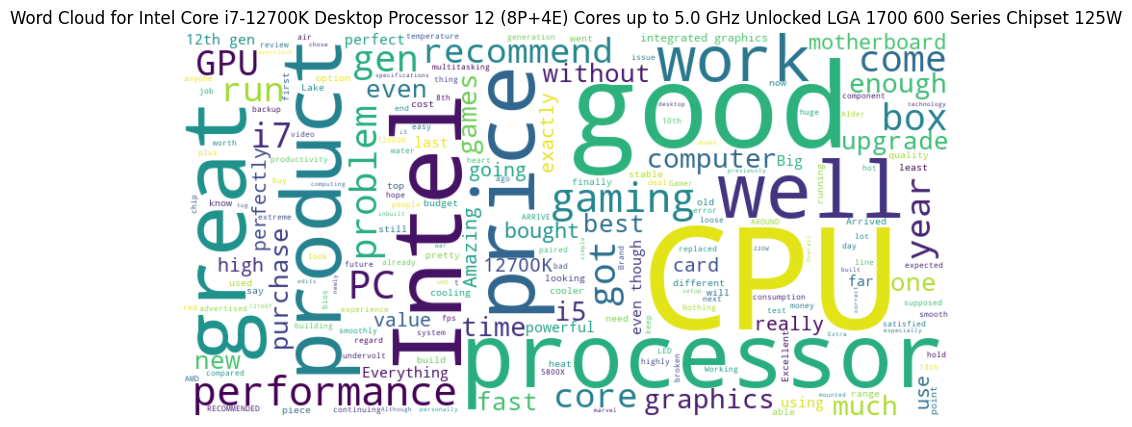

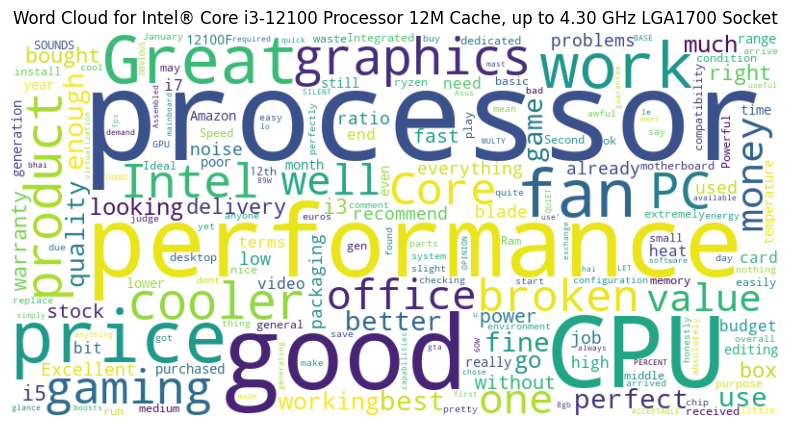

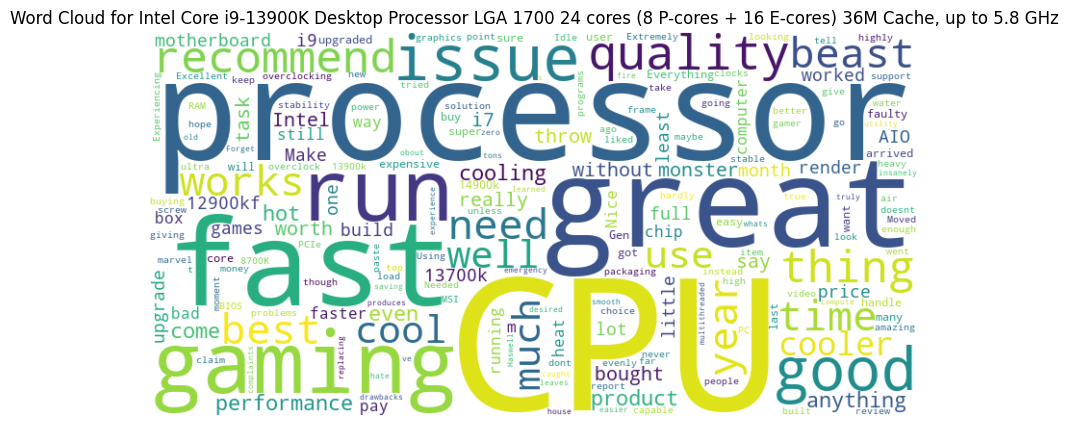

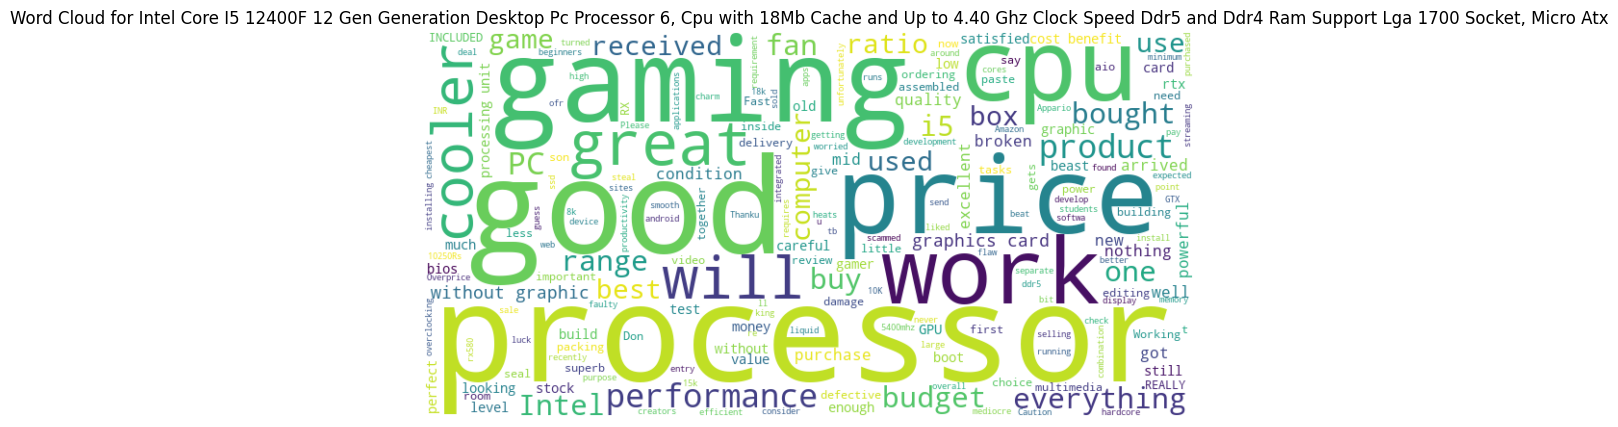

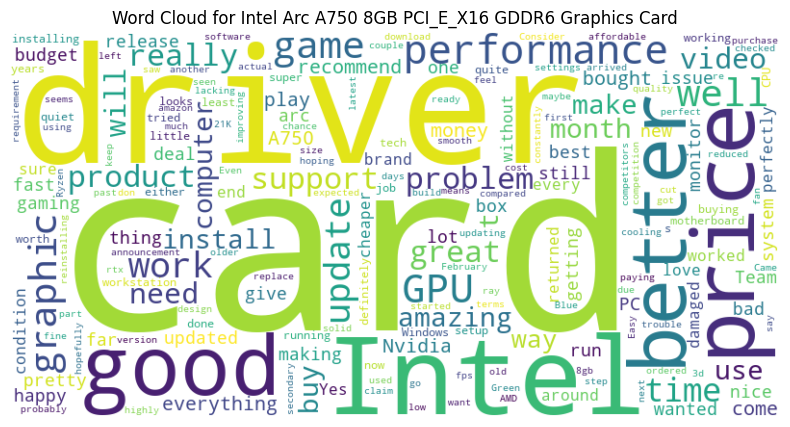

In [19]:
from wordcloud import WordCloud

# Generate and plot word clouds for each product
for product in df['Product name'].unique():
    product_reviews = ' '.join(df[df['Product name'] == product]['Review Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(product_reviews)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {product}')
    plt.show()


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review Text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic #0:
['bought', 'card', 'great', 'just', 'gaming', 'good', 'intel', 'processor', 'price', 'cpu']
Topic #1:
['performance', 'recommend', 'good', 'gen', 'intel', 'money', 'value', 'got', 'product', 'cpu']
Topic #2:
['gaming', 'product', 'quality', 'processor', 'great', 'performance', 'cpu', 'graphics', 'card', 'good']
Topic #3:
['looking', 'graphics', 'best', 'works', 'range', 'card', 'cpu', 'intel', 'good', 'processor']
Topic #4:
['new', 'cpu', 'run', 'performance', 'gaming', 'cooler', 'intel', 'good', 'processor', 'card']


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review Text'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Analyze clusters
for i in range(5):
    print(f"Cluster {i}:")
    print(df[df['Cluster'] == i]['Review Text'].head())


C:\Users\Pranav\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
0     No doubt, 12th gen Intel processors are a marv...
6     This is what is expected from its specifications.
7     I highly recommend it, especially for people l...
9     It's very fast, but it heats up a lot, it even...
12                         It was too high spec for me.
Name: Review Text, dtype: object
Cluster 1:
1     Overall good processor for the price and more ...
4     Working well, stable and can be overclock - wi...
5                Good value purchase to build a system.
10    Very good on processor tasks too, to use it to...
13                                   Everything is good
Name: Review Text, dtype: object
Cluster 2:
3     Does exactly what it's supposed to do, my comp...
8     Amazing CPU previously had a i3 12100f so for ...
11     It is an amazing CPU for price VS performance...
21    Classic Intel mid-range CPU for gaming and pro...
23                        Excellent cpu and great value
Name: Review Text, dtype: object
Cluster 3:
2     Excellent p

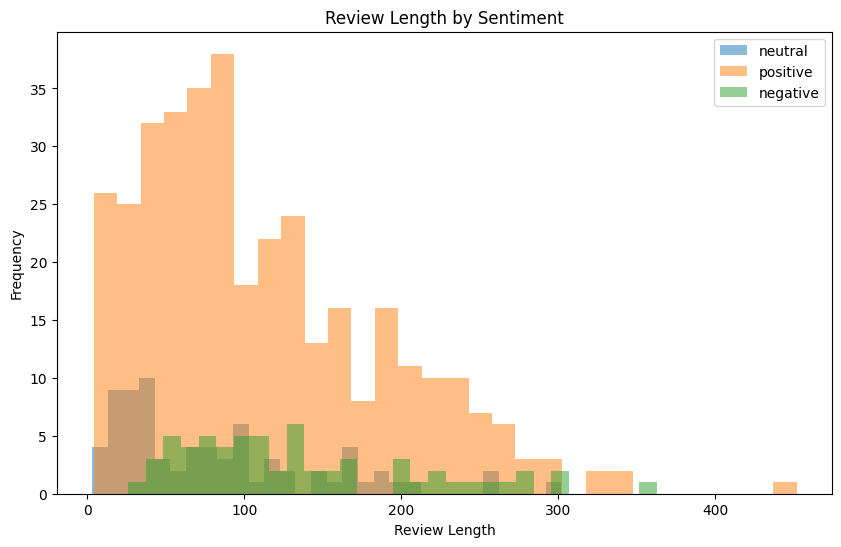

In [25]:
df['Review Length'] = df['Review Text'].apply(len)

plt.figure(figsize=(10, 6))
for sentiment in df['Sentiment'].unique():
    subset = df[df['Sentiment'] == sentiment]
    plt.hist(subset['Review Length'], alpha=0.5, label=sentiment, bins=30)

plt.title('Review Length by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


DeltaGenerator()

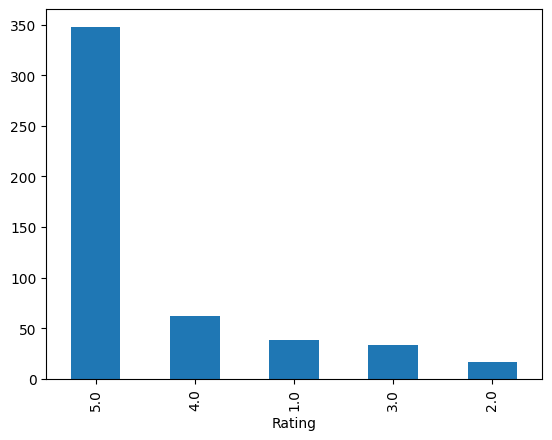

In [33]:
import streamlit as st
import pandas as pd

st.title('Product Review Analysis')

# Load data
df = pd.read_excel('intel.xlsx')

# Display data
st.write(df.head())

# Plot sentiment distribution
import matplotlib.pyplot as plt

sentiment_counts = df['Rating'].value_counts()
fig, ax = plt.subplots()
sentiment_counts.plot(kind='bar', ax=ax)
st.pyplot(fig)


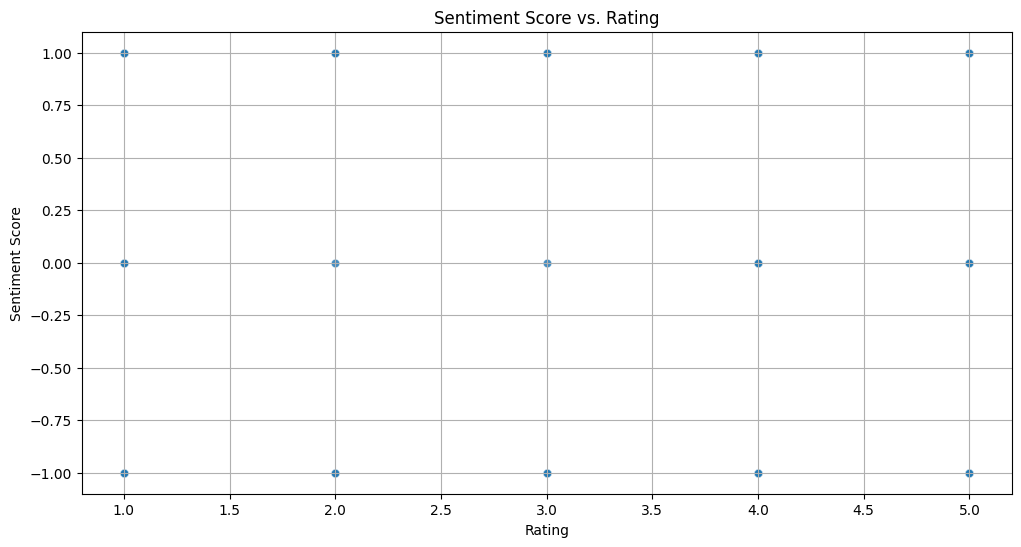

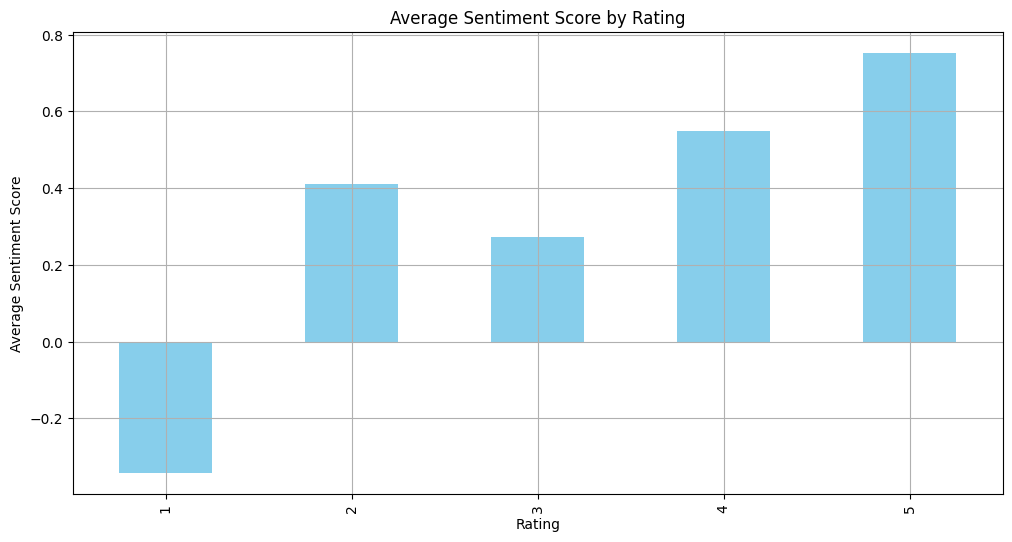

Correlation between Rating and Sentiment Score: 0.42


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the dataset
df = pd.read_excel('intel.xlsx')

# Drop rows with missing 'Review Text' or 'Rating' columns
df = df.dropna(subset=['Review Text', 'Rating'])

# Convert rating to integer if not already
df['Rating'] = df['Rating'].astype(int)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment
def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['Sentiment'] = df['Review Text'].apply(vader_sentiment)

# Map sentiment to numerical values for analysis
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['Sentiment Score'] = df['Sentiment'].map(sentiment_mapping)

# Plot sentiment score vs rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating', y='Sentiment Score', data=df, alpha=0.6)
plt.title('Sentiment Score vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

# Calculate average sentiment by rating
average_sentiment_by_rating = df.groupby('Rating')['Sentiment Score'].mean()

# Plot average sentiment by rating
plt.figure(figsize=(12, 6))
average_sentiment_by_rating.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

# Calculate correlation
correlation = df[['Rating', 'Sentiment Score']].corr().iloc[0, 1]
print(f'Correlation between Rating and Sentiment Score: {correlation:.2f}')
